Contrast Stretching

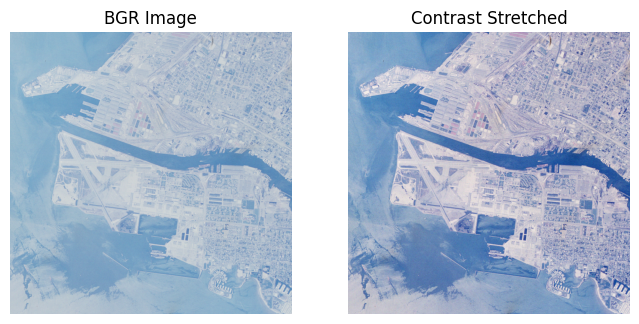

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load file
file = 'Oakland.png'
img_bgr = cv2.imread(file)

# Get height and h,w
min = 0
max = 255
(h, w, chan) = img_bgr.shape

# Method 1
# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = ((b - np.min(b)) / (np.max(b) - np.min(b))) * (max - min) + min
stretched_g = ((g - np.min(g)) / (np.max(g) - np.min(g))) * (max - min) + min
stretched_r = ((r - np.min(r)) / (np.max(r) - np.min(r))) * (max - min) + min


img_1 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_1 = img_1.astype(np.uint8)
cv2.imwrite("OaklandBGRstretched.png",img_1)


################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('BGR Image')
ax1.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()


 

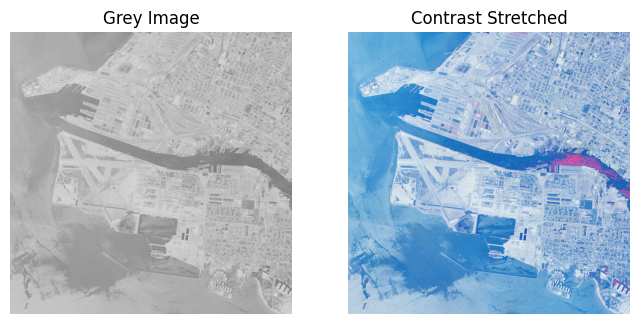

In [37]:
# Method 2 - Convert Image to hsvscale
img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
cv2.imwrite("OaklandGrey.png", img_grey)

grey_min = np.min(img_grey)
grey_max = np.max(img_grey)

stretched_grey = ((img_grey - grey_min) / (grey_max - grey_min)) * (max - min) + min



# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = ((b - grey_min) / (grey_max - grey_min)) * (max - min) + min
stretched_g = ((g - grey_min) / (grey_max - grey_min)) * (max - min) + min
stretched_r = ((r - grey_min) / (grey_max - grey_min)) * (max - min) + min

img_2 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_2 = img_2.astype(np.uint8)
cv2.imwrite("OaklandGreyStretched.png",img_2)
################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('Grey Image')
ax1.imshow(cv2.cvtColor(img_grey, cv2.COLOR_GRAY2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB))

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()


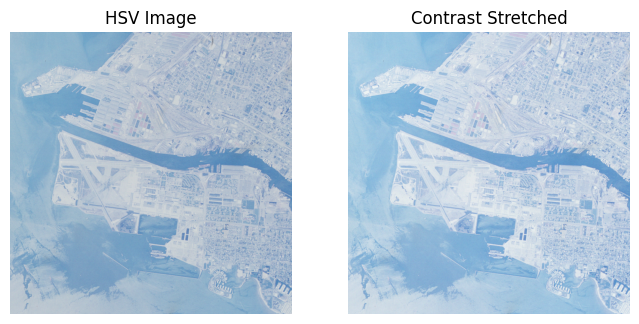

In [38]:
# Method 3 
# Convert BGR to HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

hsv_min = np.min(img_hsv)
hsv_max = np.max(img_hsv)

stretched_hsv = ((img_hsv - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min



# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = ((b - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min
stretched_g = ((g - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min
stretched_r = ((r - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min

img_3 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_3 = img_3.astype(np.uint8)
cv2.imwrite("OaklandHsvStretched.png",img_3)

################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('HSV Image')
ax1.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB))

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()

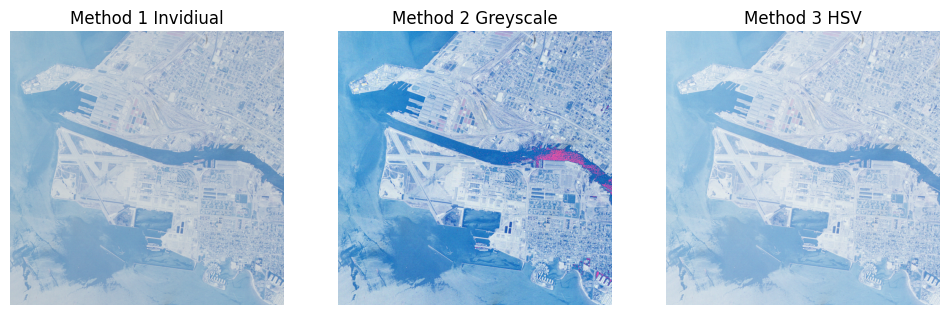

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.set_title('Method 1 Invidiual')
ax1.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

# Display the new image
ax2.set_title('Method 2 Greyscale')
ax2.imshow(cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB))

# Display the new image
ax3.set_title('Method 3 HSV')
ax3.imshow(cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB))

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

The RGB contrast difference worked the best as it takes into account the lack of contrast in each channel and then ideally stretches the contrast as much as possible within the 255 colour bounds which creates a greater contrasted image without losing details due to "clipping".

Qualitatively greyscale is second the best because the buildings in the greyscale image are not that contrasted. Thus the contrast stretching clearly creates a stronger contrast in that region which may be more ideal for this use case. However there is a loss of information data in thecentnre

The HSV contrast stretching for hsv is not as clear as there is already a high level of intensity variation and applying the same algorithm to all three channels does not yield a very cotrasted result.